# Basic example using the MOSM, Conv, CSM and SM-LMC kernels
Here we show the basic usage of the toolkit using a contrived example dataset of three sinusoidal signals. The three sinusses are each put in a channel and have the same frequency but differ in phase. The observations are randomly picked in the range of [0,4], where the first channel will have the second half of the observations removed. Each of the kernels is being evaluated on the same dataset so that we can easily compare the results. Finally, a comparison is made between the different kernels and the errors they obtain.

In [6]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

# TODO: remove when done:
%reload_ext autoreload
%autoreload 2

## Generate dataset

In [7]:
data = mogptk.Data()

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')

data.remove_range('A', start=2.0, end=None)

## MOSM

In [8]:
model_mosm = mogptk.MOSM(data, Q=3)
model_mosm.estimate_means()
model_mosm.build()
model_mosm.optimize()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


Optimizing...
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -64.440486
  Number of iterations: 1000
  Number of functions evaluations: 1137


In [9]:
print(model_mosm.get_parameters())

[{'magnitude': array([0.00094237, 0.00032145, 0.10012477]), 'mean': array([[11.91781548,  4.6961058 , 11.88698233]]), 'variance': array([[0.42077699, 0.10204637, 0.00361219]]), 'delay': array([[ 0.00000000e+00,  1.57669708e-05, -2.92856808e+00]]), 'phase': array([ 0.00000000e+00,  2.88387536e-06, -3.54738129e-01]), 'noise': array([0.18077391, 1.5413469 , 0.58102601])}, {'magnitude': array([-1.67883538e-04, -4.32268021e-04,  4.24648185e+00]), 'mean': array([[2.7945924 , 6.3250365 , 4.03633228]]), 'variance': array([[7.62497779e-01, 4.32088367e-02, 5.83831582e-05]]), 'delay': array([[ 0.        , -0.26072153,  0.97111762]]), 'phase': array([ 0.        , -0.06084482,  0.2359614 ]), 'noise': array([0.19607947, 1.59481976, 2.61418715])}, {'magnitude': array([ 0.75903851, -0.71997107,  0.65404073]), 'mean': array([[5.66781325, 5.7447675 , 5.87610811]]), 'variance': array([[0.1239886 , 0.13059419, 0.13183519]]), 'delay': array([[ 0.        ,  0.14057397, -0.06031572]]), 'phase': array([0.    

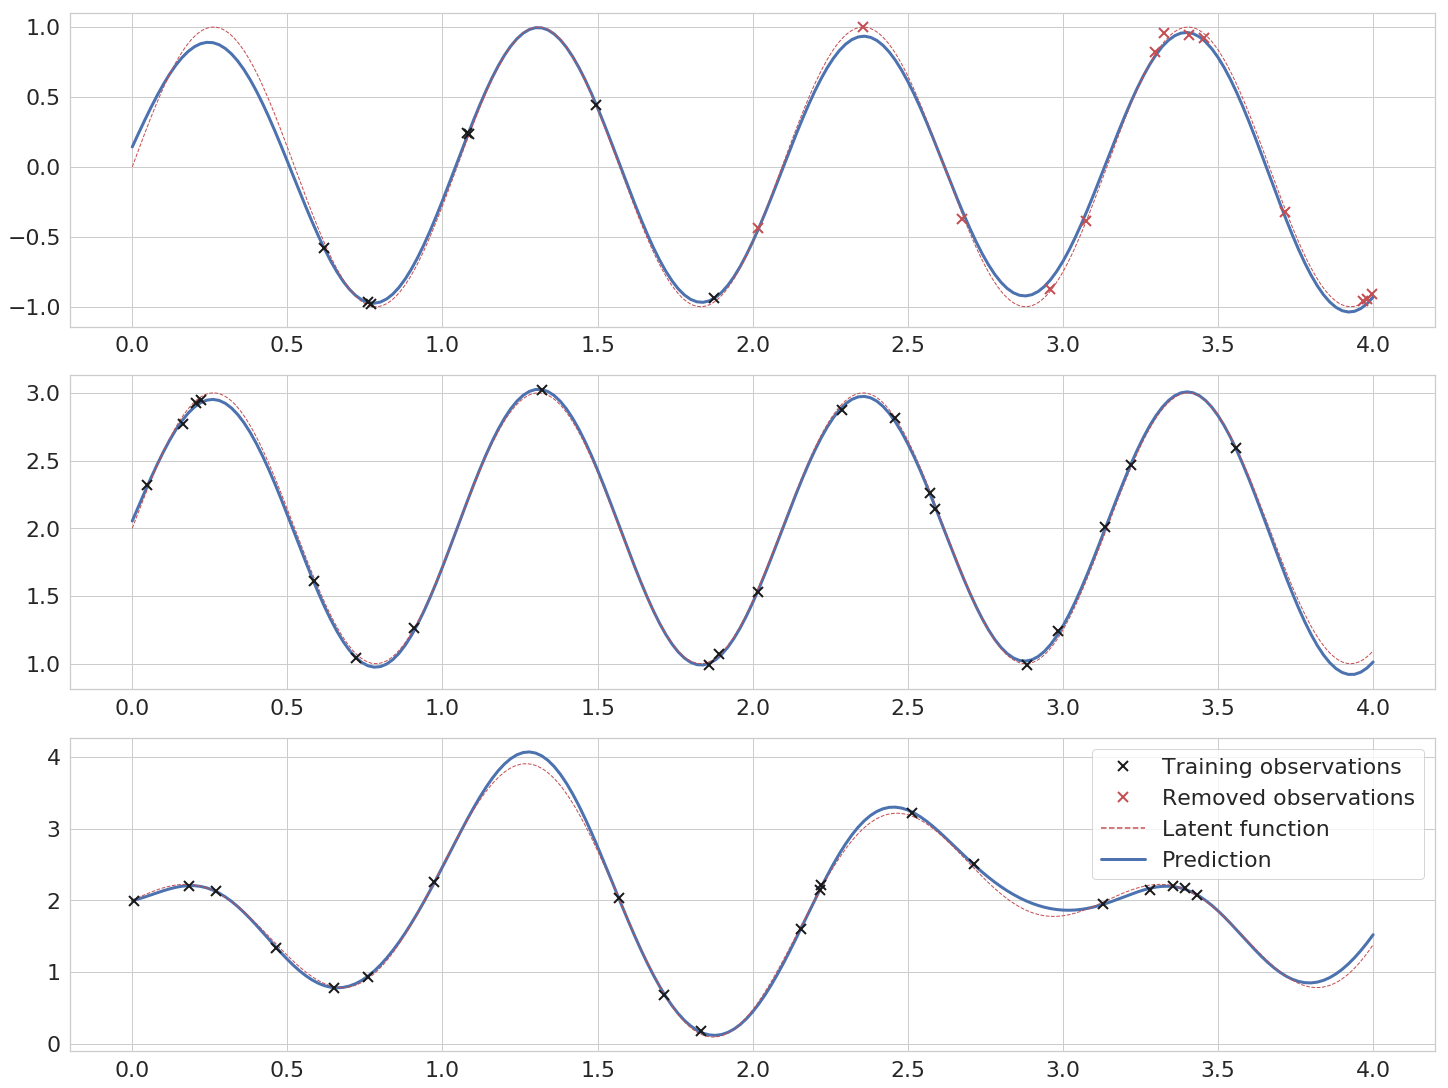

In [10]:
model_mosm.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_mosm.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_mosm.predict()

mogptk.plot(model_mosm)

## CSM

In [11]:
model_csm = mogptk.CSM(data, Q=3)
model_csm.build()
model_csm.optimize()

Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 52.380477
  Number of iterations: 46
  Number of functions evaluations: 51


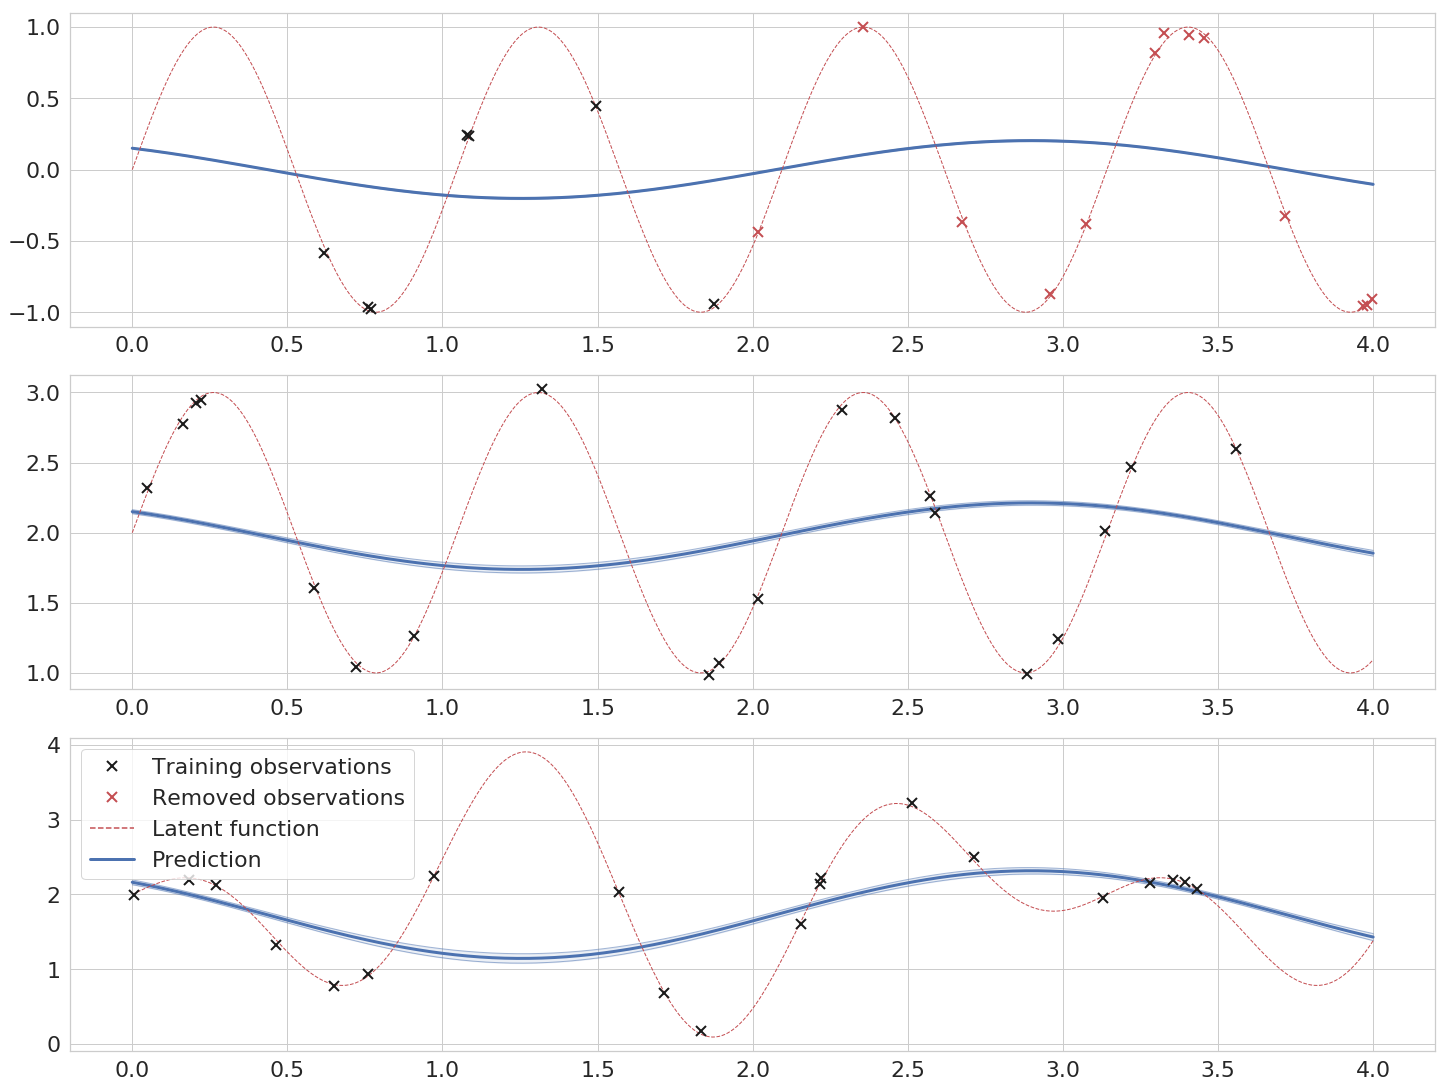

In [12]:
model_csm.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_csm.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_csm.predict()

mogptk.plot(model_csm)

## CG

In [13]:
model_cg = mogptk.CG(data, Q=3)
model_cg.build()
model_cg.optimize()

Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 30.180332
  Number of iterations: 75
  Number of functions evaluations: 98


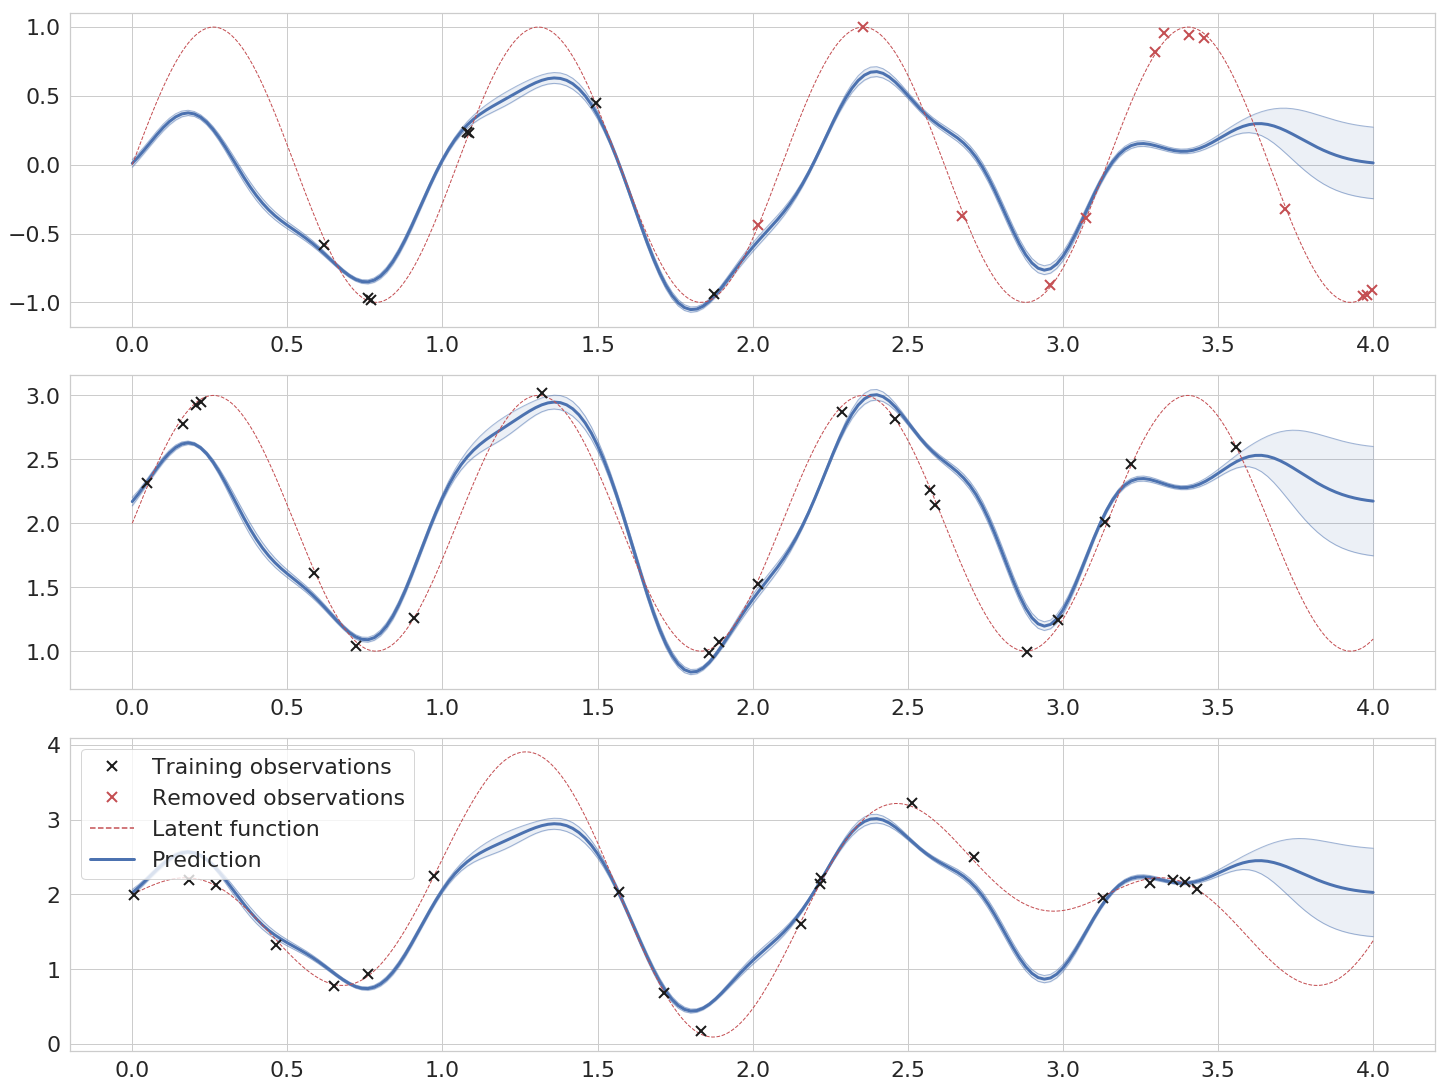

In [14]:
model_cg.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_cg.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_cg.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_cg.predict()

mogptk.plot(model_cg)

## SM-LMC

In [15]:
model_smlmc = mogptk.SM_LMC(data, Q=3)
model_smlmc.build()
model_smlmc.optimize()

Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 22.199601
  Number of iterations: 240
  Number of functions evaluations: 282


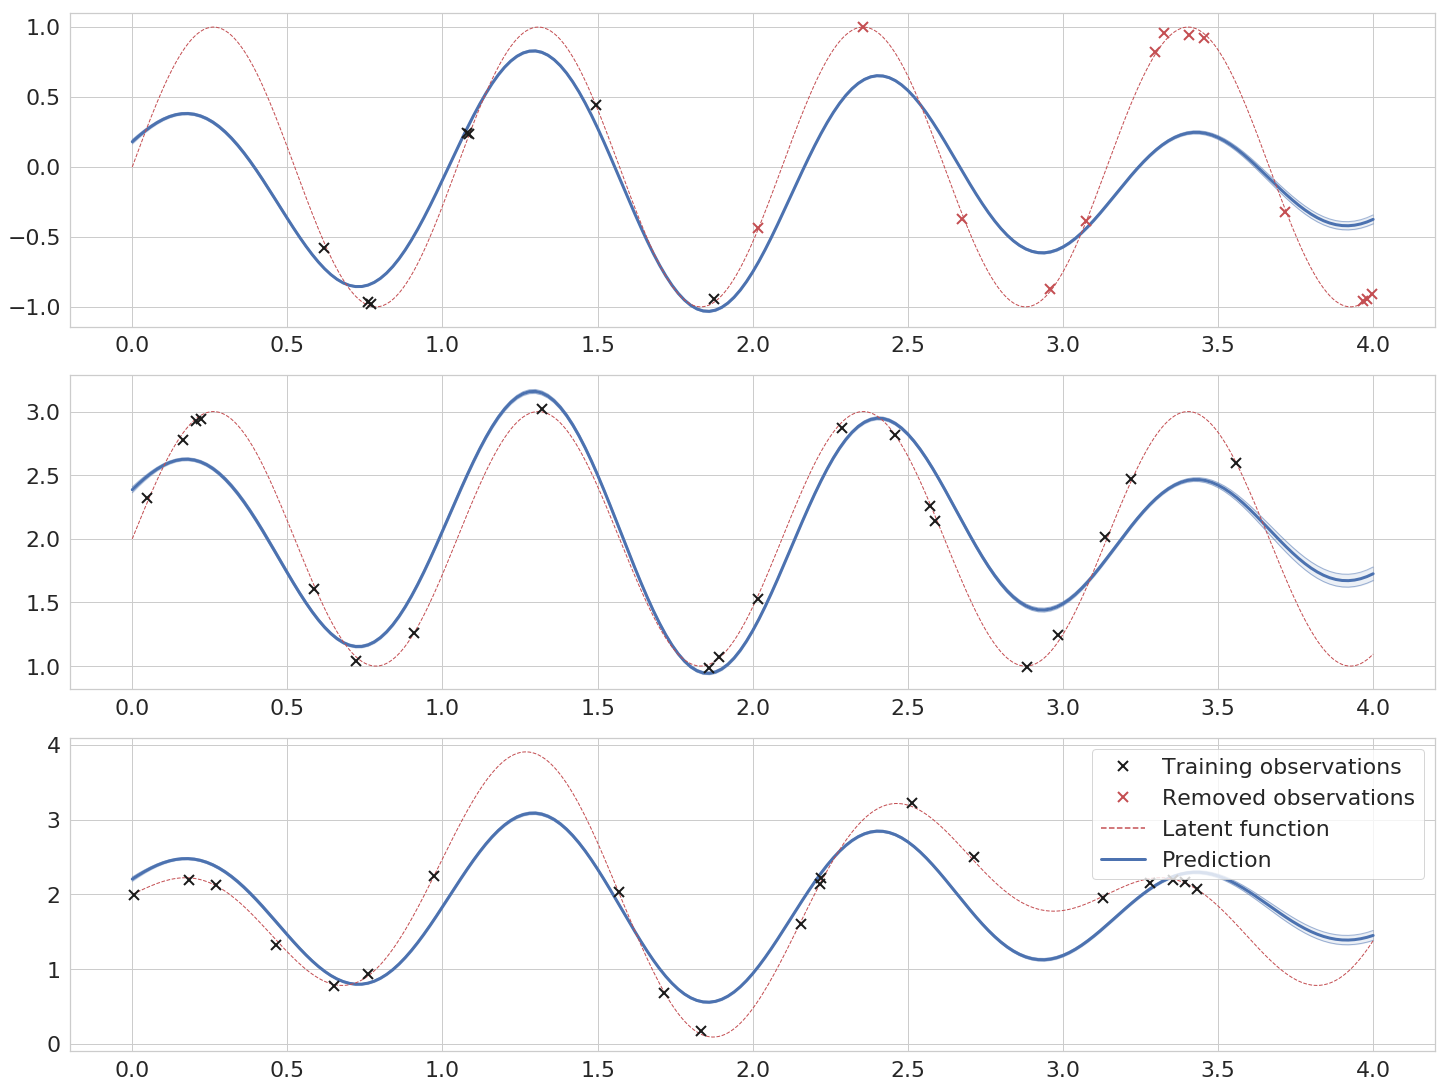

In [16]:
model_smlmc.set_prediction_range(channel='A', start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel='B', start=0, end=4, step=0.02)
model_smlmc.set_prediction_range(channel='C', start=0, end=4, step=0.02)
model_smlmc.predict()

mogptk.plot(model_smlmc)

## Error estimation

In [17]:
mogptk.errors(model_mosm, model_csm, model_smlmc, model_cg, print=True)

,MAE,MSE,MAPE
model,,,
MOSM,0.038305,0.001956,6.129930
CSM,0.732148,0.581732,102.020870
SM-LMC,0.455498,0.261207,58.386244
CG,0.596717,0.463749,82.431442


In [ ]:
data.get_bnse_estimation()